In [ ]:
%cd /content/drive/MyDrive/Master_assignment/Seminar2/code-comment-classification

/content/drive/MyDrive/Master_assignment/Seminar2/code-comment-classification


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Master_assignment/Seminar2/code-comment-classification/python/input/python.csv")

In [ ]:
import matplotlib.pyplot as plt

df['unique_word_count'] = df['comment_sentence'].apply(lambda x: len(set(str(x).split())))

print(df[['comment_sentence', 'unique_word_count']])


                                        comment_sentence  unique_word_count
0      abstract cbv mixin that gives access mixins th...                 10
1                                         functionality.                  1
2         more than one migration matches a name prefix.                  8
3                                  stub of an appconfig.                  4
4            only provides a label and a dict of models.                  8
...                                                  ...                ...
12770              server s response to an http request.                  7
12771  base class that all auth implementations deriv...                  8
12772     the header value provided was somehow invalid.                  7
12773  the fully mutable class preparedrequest prepar...                  6
12774  containing the exact bytes that will be sent t...                 10

[12775 rows x 2 columns]


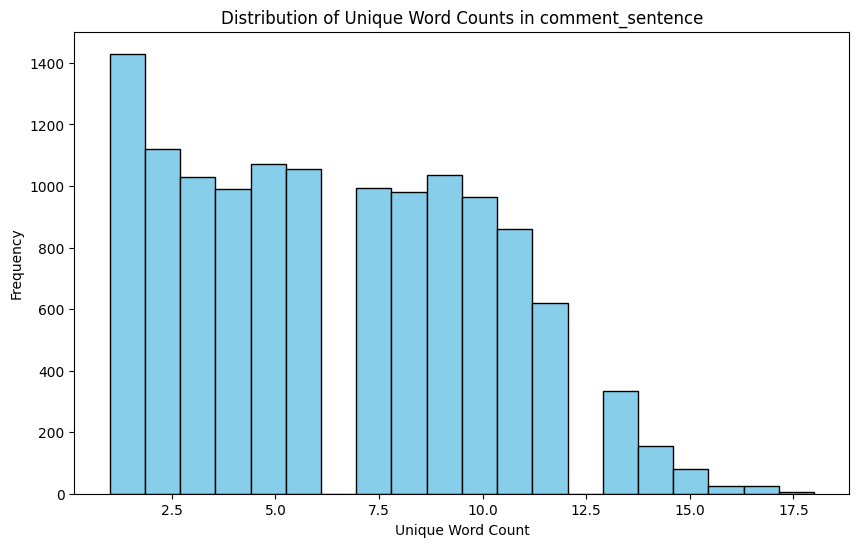

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['unique_word_count'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Unique Word Counts in comment_sentence')
plt.xlabel('Unique Word Count')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df

,comment_sentence_id,class,comment_sentence,partition,instance_type,category
0,2,Abfss.java,this impl delegates to the old filesystem,0,0,summary
1,516,FileSystemApplicationHistoryStore.java,@link #applicationstarted applicationstartdata...,1,0,summary
2,517,FileSystemApplicationHistoryStore.java,be invoked first when writing any history data...,0,0,summary
3,6,AbstractContractGetFileStatusTest.java,the tree parameters.,1,0,summary
4,518,FileSystemApplicationHistoryStore.java,"open a file, while @link #applicationfinished ...",0,0,summary
...,...,...,...,...,...,...
16921,5108,VScrollTable.java,example itabpanel just set contained component...,0,1,rational
16922,5109,VScrollTable.java,when changing tabs.,0,1,rational
16923,5110,VScrollTable.java,updates first visible row for the case we cann...,0,1,rational
16924,5111,VScrollTable.java,this method has logic which rows needs to be r...,0,1,rational


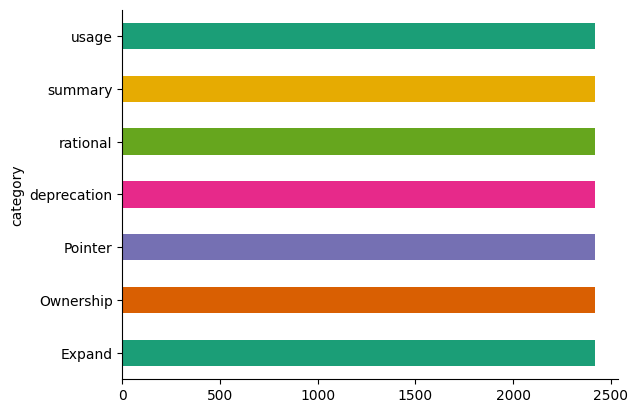

In [ ]:
# @title category

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
data_train = df[(df['partition']==0) & (df['category']=="deprecation")]
data_test = df[(df['partition']==1) & (df['category']=="deprecation")]

In [ ]:
data_train

,comment_sentence_id,class,comment_sentence,partition,instance_type,category
9652,1,Abfss.java,azure blob file system implementation of abstr...,0,0,deprecation
9654,1028,TestConnCache.java,this class tests the client connection caching...,0,0,deprecation
9656,6,AbstractContractGetFileStatusTest.java,the tree parameters.,0,0,deprecation
9658,8,AbstractContractGetFileStatusTest.java,accept everything.,0,0,deprecation
9660,9,AbstractContractGetFileStatusTest.java,the tree parameters.,0,0,deprecation
...,...,...,...,...,...,...
16641,4918,ShouldWriteDataDelegate.java,@since 75.0,0,1,deprecation
16642,4535,AbstractMultiSelectState.java,@since 80,0,1,deprecation
16643,4855,QueryBuilder.java,"@deprecated as of 80, no replacement available.",0,1,deprecation
16644,4601,ButtonRenderer.java,@since 74,0,1,deprecation


In [ ]:
#for_one_category
X_train = data_train['comment_sentence']
y_train = data_train['instance_type']
X_test = data_test['comment_sentence']
y_test = data_test['instance_type']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

text_clf = Pipeline([('vect', CountVectorizer(ngram_range=(1,1),
                                             max_df=0.7,
                                             max_features=None)),
                     ('tfidf', TfidfTransformer()),
                    ('clf', SVC(kernel='rbf'))
                    ])

text_clf = text_clf.fit(X_train, y_train)

# **GridSearchCV with SVMs, Logistic Regression, Random Forest, Naive Bayes and XGBoost(with k-fold)**

# *Import necessary libraries*

In [1]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# *Create Pipelines*

In [2]:
def create_pipeline(model):
    return Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', model)
    ])

In [3]:
models_and_params = [
    (create_pipeline(SVC(probability=True)), {
        'clf__kernel': ['linear', 'rbf'],
        'clf__C': [1, 5, 10]
    }),
    (create_pipeline(LogisticRegression()), {
        'clf__C': [1, 5, 10]
    }),
    (create_pipeline(MultinomialNB()), {}),
    (create_pipeline(RandomForestClassifier()), {
        'clf__n_estimators': [50, 100, 200],
        'clf__max_depth': [None, 10, 20],
        'clf__min_samples_split': [2, 5, 10]
    }),
    (create_pipeline(XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')), {
        'clf__n_estimators': [50, 100, 200],
        'clf__max_depth': [3, 6, 10],
        'clf__learning_rate': [0.01, 0.1, 0.2]
    })
]


# ***Evaluate***

In [5]:
def evaluate_models(grid_search_results, X_test, y_test):
    results = []

    for grid_search, model_pipeline in grid_search_results:
        # Get the best model from grid search
        best_model = grid_search.best_estimator_

        # Predict using the best model
        y_pred = best_model.predict(X_test)

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        precision_weighted = precision_score(y_test, y_pred, average='weighted')
        recall_weighted = recall_score(y_test, y_pred, average='weighted')
        f1_weighted = f1_score(y_test, y_pred, average='weighted')

        #AUC_ROC
        y_prob = best_model.predict_proba(X_test)[:, 1]
        auc_roc = roc_auc_score(y_test, y_prob)

        # Append results to the list
        results.append({
            'Model': model_pipeline.named_steps['clf'].__class__.__name__,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'Precision_Weighted': precision_weighted,
            'Recall_Weighted': recall_weighted,
            'F1 Score_Weighted': f1_weighted,
            'AUC-ROC': auc_roc
        })

    return results


# **Training**

In [6]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create an empty DataFrame to store all results
all_metrics_df = pd.DataFrame(columns=[
    'Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score',
    'Best Params', 'Best Score (Mean CV)', 'Test Score (Std CV)',
    'Accuracy (CV)', 'Precision (CV)', 'Recall (CV)', 'F1 Score (CV)'
])

# Loop through each language and each category
for language in ["java", "python", "pharo"]:
    # Load the dataset for the current language
    df = pd.read_csv(f"/content/drive/MyDrive/Master_assignment/Seminar2/code-comment-classification/{language}/input/{language}.csv")
    for category in df['category'].unique():
        # Split the data into train and test sets based on partition and category
        data_train = df[(df['partition'] == 0) & (df['category'] == category)]
        data_test = df[(df['partition'] == 1) & (df['category'] == category)]

        # Load X (features) and y (labels)
        X_train = data_train['comment_sentence']
        y_train = data_train['instance_type']
        X_test = data_test['comment_sentence']
        y_test = data_test['instance_type']

        # Perform Grid Search with k-fold cross-validation and store metrics for each fold
        grid_search_results = perform_gridsearch(X_train, y_train, models_and_params, cv=5)

        # Evaluate each model and save the results to the DataFrame
        for grid_search, model_pipeline in grid_search_results:
            # Get the best model and average metrics from k-fold cross-validation
            best_model = grid_search.best_estimator_
            # mean_test_scores = grid_search.cv_results_['mean_test_score']
            # std_test_scores = grid_search.cv_results_['std_test_score']

            best_index = grid_search.best_index_
            # Calculate average metrics across folds
            avg_accuracy = grid_search.cv_results_['mean_test_accuracy'][best_index]
            avg_precision = grid_search.cv_results_['mean_test_precision'][best_index]
            avg_recall = grid_search.cv_results_['mean_test_recall'][best_index]
            avg_f1 = grid_search.cv_results_['mean_test_f1'][best_index]

            # Evaluate the best model on the test set
            y_pred = best_model.predict(X_test)

            # Calculate final test metrics
            test_accuracy = accuracy_score(y_test, y_pred)
            test_precision = precision_score(y_test, y_pred)
            test_recall = recall_score(y_test, y_pred)
            test_f1 = f1_score(y_test, y_pred)

            # Add information about the model, parameters, and scores
            metrics = {
                'Model': model_pipeline.named_steps['clf'].__class__.__name__ + f"_{language}_{category}",
                'Accuracy': test_accuracy,
                'Precision': test_precision,
                'Recall': test_recall,
                'F1 Score': test_f1,
                'Best Params': grid_search.best_params_,
                # 'Best Score (Mean CV)': grid_search.best_score_,
                # 'Test Score (Std CV)': std_test_scores[grid_search.best_index_],
                'Accuracy (CV)': avg_accuracy,
                'Precision (CV)': avg_precision,
                'Recall (CV)': avg_recall,
                'F1 Score (CV)': avg_f1
            }

            # Append metrics to the main results DataFrame
            all_metrics_df = pd.concat([all_metrics_df, pd.DataFrame([metrics])], ignore_index=True)

# Save the consolidated DataFrame to a CSV file
result_file_path = "/content/drive/MyDrive/Master_assignment/Seminar2/code-comment-classification/results/All_Results_Final.csv"
all_metrics_df.to_csv(result_file_path, index=False)

# Display the final DataFrame with all results
print(all_metrics_df)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:19:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
<ipython-input-6-720d35b148f9>:69: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_metrics_df = pd.concat([all_metrics_df, pd.DataFrame([metrics])], ignore_index=True)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:21:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:24:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encod

                                         Model  Accuracy  Precision    Recall  \
0                             SVC_java_summary  0.883673   0.767857  0.494253   
1              LogisticRegression_java_summary  0.885714   0.781818  0.494253   
2                   MultinomialNB_java_summary  0.834694   1.000000  0.068966   
3          RandomForestClassifier_java_summary  0.889796   0.823529  0.482759   
4                   XGBClassifier_java_summary  0.871429   0.681818  0.517241   
..                                         ...       ...        ...       ...   
90                     SVC_pharo_Collaborators  0.908078   0.333333  0.178571   
91      LogisticRegression_pharo_Collaborators  0.927577   0.666667  0.142857   
92           MultinomialNB_pharo_Collaborators  0.922006   0.000000  0.000000   
93  RandomForestClassifier_pharo_Collaborators  0.927577   1.000000  0.071429   
94           XGBClassifier_pharo_Collaborators  0.927577   0.666667  0.142857   

    F1 Score               